<a href="https://colab.research.google.com/github/lkidane/Very-Deep-Convolutional-Networks-For-Raw-Waveforms-pytorch-implementation/blob/master/Audio_classifier_implementation_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Audio Classifier
=========================

## Important information

* Choose a group name/number and rename the file with it.
* Be sure to enter the names of every member in the group in the cell below.
* Use the power of number and work together as a team.
* You can employ the use of the HPC (high perfomance computer) provided your server account has been established.
* The tutor is always available to give more explanation and assistance whenever/wherever required, but make sure you have made effort yourself.
* Please remove all test codes.
* The solutions to the tasks should be turn in on Friday 13th Dec, end of the day (12am). 
* A notebook submission is required per group, no multiple submissions from same group. Submit by attaching only the .ipynb file please, not zip and I don't need other files (e.g the data) I already have them.

Group ......

    Member 1
    Member 2
    Member 3
    Member 4

This task is inspired by the Audio Classifier Tutorial (found [here](https://pytorch.org/tutorials/beginner/audio_classifier_tutorial.html?highlight=audio))
**Author**: `Winston Herring <https://github.com/winston6>`_

This tutorial will show you how to correctly format an audio dataset and
then train/test an audio classifier network on the dataset. First, let’s
import the common torch packages as well as ``torch``, ``torchaudio``, ``pandas``,
and ``numpy``. ``torchaudio`` is available `here <https://github.com/pytorch/audio>`_
and can be installed by following the
instructions on the website but I encountered a lot of trouble installing it, this ` conda install -c pytorch torchaudio-cpu ` rather worked for me.

If you have a CUDA GPU use that. Running
the network on a GPU will greatly decrease the training/testing runtime.




1: Importing the Dataset
---------------------

We will use the UrbanSound8K dataset to train our network. It is
available for free `here <https://urbansounddataset.weebly.com/>`_ and contains
10 audio classes with over 8000 audio samples! Once you have downloaded
the compressed dataset, extract it to your current working directory.
First, we will look at the csv file that provides information about the
individual sound files. ``pandas`` allows us to open the csv file and
use ``.iloc()`` to access the data within it.




The 10 audio classes in the UrbanSound8K dataset are air_conditioner,
car_horn, children_playing, dog_bark, drilling, enginge_idling,
gun_shot, jackhammer, siren, and street_music. Let’s play a couple files
and see what they sound like. The first file is street music and the
second is an air conditioner.




2: Formatting the Data
-------------------

Now that we know the format of the csv file entries, we can construct
our dataset. We will create a rapper class for our dataset using
``torch.utils.data.Dataset`` that will handle loading the files and
performing some formatting steps. The UrbanSound8K dataset is separated
into 10 folders. We will use the data from 9 of these folders to train
our network and then use the 10th folder to test the network. The rapper
class will store the file names, labels, and folder numbers of the audio
files in the inputted folder list when initialized. The actual loading
and formatting steps will happen in the access function ``__getitem__``.

In ``__getitem__``, we use ``torchaudio.load()`` to convert the wav
files to tensors. ``torchaudio.load()`` returns a tuple containing the
newly created tensor along with the sampling frequency of the audio file
(44.1kHz for UrbanSound8K). The dataset uses two channels for audio so
we will use ``torchaudio.transforms.DownmixMono()`` (not available in the latest version of `torchaudio`) to convert the audio
data to one channel. Next, we need to format the audio data. The network
we will make takes an input size of 32,000, while most of the audio
files have well over 100,000 samples. The UrbanSound8K audio is sampled
at 44.1kHz, so 32,000 samples only covers around 700 milliseconds. By
downsampling the audio to aproximately 8kHz, we can represent 4 seconds
with the 32,000 samples. This downsampling is achieved by taking every
fifth sample of the original audio tensor. Not every audio tensor is
long enough to handle the downsampling so these tensors will need to be
padded with zeros. The minimum length that won’t require padding is
160,000 samples.




3: Define the Network
------------------

For this task we want to closely reproduce the achitectures described in https://arxiv.org/pdf/1610.00087.pdf. You task is to read extensively the paper and reproduce the achitectures <font color='green'> M3, M5, M11 and M18. The M34-res is a bonus.</font>
While attempting to reproduce the architectures endeavour to read through the common [pitfalls](https://urbansounddataset.weebly.com/urbansound8k.html#10foldCV) to get it right.

We will use the same optimization technique used in the paper, an Adam
optimizer with weight decay set to 0.0001. At first, we will train with
a learning rate of 0.01, but we will use a ``scheduler`` to decrease it
to 0.001 during training.




4: Training and Testing the Network
--------------------------------

You can define a training function that will feed our training data into the model and perform the backward pass and optimization steps. You can also make one for testing the networks accuracy and set the model to ``eval()`` mode and then run inference on the test dataset. Calling ``eval()`` sets the training variable in all modules in the network to false. Certain layers like batch normalization and dropout layers behave differently during training so this step is crucial for getting correct results.




Finally, we can train and test the network. Train the network for as many epochs as time allows you. The network will be tested after each epoch to see how the accuracy varies during the training.

Conclusion
----------

If trained on 9 folders, the network should be about 40% accurate by the end of the training process for the least possible epochs. Training on less folders will result in a lower overall accuracy. Greater accuracies can be achieved using deeper CNNs at the expense of a larger memory footprint.

For more advanced audio applications, such as speech recognition,
recurrent neural networks (RNNs) are commonly used. There are also other
data preprocessing methods, such as finding the mel frequency cepstral
coefficients (MFCC), that can reduce the size of the dataset.




<font color='red'>GOOD NEWS</font> : Solutions to the first two section have been given to you freely. <font color='blue'>You are welcome</font>. 

In [2]:
!pip3 install torchaudio

     |████████████████████████████████| 2.7MB 2.8MB/s 
     |████████████████████████████████| 773.1MB 23kB/s 
ERROR: torchvision 0.4.2 has requirement torch==1.3.1, but you'll have torch 1.3.0 which is incompatible.
  Found existing installation: torch 1.3.1
    Uninstalling torch-1.3.1:
      Successfully uninstalled torch-1.3.1


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset
import torchaudio
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
class AudioDataset(Dataset):
   

    def __init__(self, file_path, audio_paths, folds):
        """
        Args:
            file_path(string): path to the audio csv file
            root_dir(string): directory with all the audio folds
            folds: integer corresponding to audio fold number or list of fold number if more than one fold is needed
        """
        csvData = pd.read_csv(file_path)
        #initialize lists to hold file names, labels, and folder numbers
        self.file_names = []
        self.labels = []
        self.folders = []
        #loop through the csv entries and only add entries from folders in the folder list
        for i in range(0,len(csvData)):
            if csvData.iloc[i, 5] in folds:
                self.file_names.append(csvData.iloc[i, 0])
                self.labels.append(csvData.iloc[i, 6])
                self.folders.append(csvData.iloc[i, 5])
                
        self.audio_paths = audio_paths
        #self.mixer = torchaudio.transforms.DownmixMono() #UrbanSound8K uses two channels, this will convert them to one
        self.folds = folds
    

    def __len__(self):
        return len(self.audio_paths)

    def __getitem__(self, idx):
        
        audio_path = self.audio_paths + "/" + "fold" + str(self.folders[idx]) + "/" + self.file_names[idx]
        #audio_path = self.audio_paths[index]
        audio, rate = torchaudio.load(audio_path, normalization=True)
        audio = audio.mean(0, keepdim=True)
        c, n = audio.shape
        zero_need = 160000 - n
        audio_new = F.pad(audio, (zero_need //2, zero_need //2), 'constant', 0)
        audio_new = audio_new[:,::5]
        
        #Getting the corresponding label
        audio_name = audio_path.split(sep='/')[-1]
        #labels = self.audio_file.loc[self.audio_file.slice_file_name == audio_name].iloc[0,-2]
        
        return audio_new, self.labels[idx]
      
    def __len__(self):
        return len(self.file_names)

    


In [0]:
class M3(nn.Module):
    def __init__(self):
        super(M3, self).__init__()
        self.conv1 = nn.Conv1d(1, 256, 80, 4, padding=38)
        self.bn1 = nn.BatchNorm1d(256)
        self.pool1 = nn.MaxPool1d(4)
        self.conv2 = nn.Conv1d(256, 256, 3, padding=1)
        self.bn2 = nn.BatchNorm1d(256)
        self.pool2 = nn.MaxPool1d(4)
        self.conv3 = nn.Conv1d(256, 10, 3, padding=1)
        self.avgPool = nn.AvgPool1d(500) #input should be 512x30 so this outputs a 512x1

        
    def forward(self, x):
        x = self.conv1(x)
        
        x = F.relu(self.bn1(x))
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        x = self.pool2(x)
        x = self.conv3(x)
        
        x = self.avgPool(x)
        x = x.view(-1, 10)
        
        return x

# model = M3()
# audio = torch.zeros(1,32000)
# print(model(audio.unsqueeze(0)).shape)


In [0]:
class M5(nn.Module):
    def __init__(self):
        super(M5, self).__init__()
        self.conv1 = nn.Conv1d(1, 128, 80, 4, padding=38)
        self.bn1 = nn.BatchNorm1d(128)
        self.pool1 = nn.MaxPool1d(4)
        self.conv2 = nn.Conv1d(128, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm1d(128)
        self.pool2 = nn.MaxPool1d(4)
        self.conv3 = nn.Conv1d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm1d(256)
        self.pool3 = nn.MaxPool1d(4)
        self.conv4 = nn.Conv1d(256, 512, 3, padding=1)
        self.bn4 = nn.BatchNorm1d(512)
        self.pool4 = nn.MaxPool1d(4)
        self.conv5 = nn.Conv1d(512, 10, 3, padding=1)
        self.avgPool = nn.AvgPool1d(31)
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        x = self.pool2(x)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        x = self.pool3(x)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        x = self.pool4(x)
        x = self.conv5(x)
        x = self.avgPool(x)
        x = x.view(-1, 10)
        return x

# model = M5()
# audio = torch.zeros(1,32000)
# print(model(audio.unsqueeze(0)).shape)

In [0]:
def m_block(input_channels, output_channels, num_layers):
  
  first_layer =  [
          nn.Conv1d(input_channels, output_channels, 3, padding=1),
          nn.BatchNorm1d(output_channels),
          nn.ReLU(),
        ] 
  other_layers = [
          nn.Conv1d(output_channels, output_channels, 3, padding=1),
          nn.BatchNorm1d(output_channels),
          nn.ReLU(),
       ] * (num_layers-1) 
  max_pool_layer = [ nn.MaxPool1d(4)]

  all_layers = first_layer + other_layers + max_pool_layer

  block = nn.Sequential(*all_layers)
  return block
class M11(nn.Module):
    def __init__(self):
        super(M11, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, 80, 4,padding=38)
         
        self.bn1 = nn.BatchNorm1d(64)

        self.pool1 = nn.MaxPool1d(4)

        self.block_1 = m_block(64, 64, 2)


        self.block_2 = m_block(64, 128, 2)


        self.block_3 = m_block(128, 256, 3)



        self.block_4 = m_block(256, 512, 2)

        self.conv2 = nn.Conv1d(512, 10, 3, padding=1)
        self.avgPool = nn.AvgPool1d(7) #input should be 512x30 so this outputs a 512x1
        
        
    def forward(self, x):
       
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        x = self.pool1(x)
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.block_4(x)
        x = self.conv2(x)
        x = self.avgPool(x)
        x = x.view(-1, 10)
        return x


# model = M11()
# audio = torch.zeros(1,32000)
# print(model(audio.unsqueeze(0)).shape)

In [0]:

class M18(nn.Module):
    def __init__(self):
        super(M18, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, 80, 4,padding=38)
         
        self.bn1 = nn.BatchNorm1d(64)

        self.pool1 = nn.MaxPool1d(4)

        self.block_1 = m_block(64, 64, 4)

        self.block_2 = m_block(64, 128, 4)

        self.block_3 = m_block(128, 256, 4)

        self.block_4 = m11_block(256, 512, 4)

        self.conv2 = nn.Conv1d(512, 10, 3, padding=1)
        self.avgPool = nn.AvgPool1d(7) #input should be 512x30 so this outputs a 512x1
        
        
    def forward(self, x):
       
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        x = self.pool1(x)
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.block_4(x)
        x = self.conv2(x)
        x = self.avgPool(x)
        x = x.view(-1, 10)
        return x


# model = M18()
# audio = torch.zeros(1,32000)
# print(model(audio.unsqueeze(0)).shape)

In [0]:
class ResUnit(nn.Module):
  def __init__(self, input_channels, output_channels):
    super(ResUnit, self).__init__()
    self.conv1 = nn.Conv1d(input_channels, output_channels, 3, padding=1)
    self.bn1 = nn.BatchNorm1d(num_features=output_channels)
    self.conv2 = nn.Conv1d(output_channels, output_channels, 3, padding=1)
    self.bn2 = nn.BatchNorm1d(num_features=output_channels)
  def forward(self, x):
    x = self.bn1(self.conv1(x))
    x = F.relu(x)

    x = self.bn2(self.conv2(x))
    x = F.relu(x)

    return x
    


class ResBlock(nn.Module):
  def __init__(self, input_channels, output_channels, num_layers, is_pool=True):
    super(ResBlock, self).__init__()
    self.input_channels = input_channels
    self.output_channels = output_channels
    self.num_layers = num_layers
    self.pool =  nn.MaxPool1d(4)
    self.is_pool = is_pool
    
  def forward(self, x):
    for i in range(self.num_layers):
      conv = nn.Conv1d(x.shape[1], self.output_channels, 1)
      res = conv(x) 
      if i==0:
        unit = ResUnit(self.input_channels, self.output_channels)
      else:
        unit = ResUnit(self.output_channels, self.output_channels)
      x = unit(x)
      x = res + x
    if self.is_pool:
      x = self.pool(x)
    return x


    
class M34Res(nn.Module):
    def __init__(self):
        super(M34Res, self).__init__()
        self.conv1 = nn.Conv1d(1, 48, 80, 4,padding=38)
        self.bn1 = nn.BatchNorm1d(48)
        self.pool1 = nn.MaxPool1d(4)
  

        self.block_1 = ResBlock(48, 48, 3)

        self.block_2 = ResBlock(48, 96, 4)

        self.block_3 = ResBlock(96, 192, 6)

        self.block_4 = ResBlock(192, 384, 3, is_pool=False)

        self.conv2 = nn.Conv1d(384, 10, 3, padding=1)
        self.avgPool = nn.AvgPool1d(31) #input should be 512x30 so this outputs a 512x1
        
        
    def forward(self, x):
       
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        x = self.pool1(x)
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.block_4(x)
        x = self.conv2(x)
        x = self.avgPool(x)
        x = x.view(-1, 10)
        return x



In [0]:
class KFoldIterable:
  def __init__(self, batch_size=64):
    self.file_path = '/content/drive/My Drive/UrbanSound8K/metadata/UrbanSound8K.csv'
    self.audio_paths = '/content/drive/My Drive/UrbanSound8K/audio'
    self.all_folders = list(range(1, 11))
    self.current_pos = 0 
    self.batch_size = batch_size
    

  def __iter__(self):
    return self
  def __next__(self): 
    if self.current_pos>=len(self.all_folders):
      raise StopIteration
    folder = self.all_folders[self.current_pos]
    self.current_pos += 1

    test_folders = [folder]
    train_folders = [f for f in self.all_folders if f!= folder]

    train_set = AudioDataset(self.file_path, self.audio_paths, train_folders)
    test_set = AudioDataset(self.file_path, self.audio_paths, test_folders)

    kwargs = {'num_workers': 10, 'pin_memory': True} if device == 'cuda' else {} #needed for using datasets on gpu

    train_loader = torch.utils.data.DataLoader(train_set, batch_size = self.batch_size, shuffle = True, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size = self.batch_size, shuffle = False, **kwargs)
    print("Current K-Fold is: {}".format(folder))
    return train_loader, test_loader, folder

In [0]:
def plot_history(train_history, test_history, model_type, fold):
  train_losses, train_accs = train_history
  test_losses, test_accs = test_history
  plt.figure(figsize=(14, 8))
  plt.subplot(121)
  plt.title("Train and Test accuracies for model: {} and fold: {}".format(model_type, fold))
  plt.plot(train_accs, label="train_acc")
  plt.plot(test_accs, label="test_acc")
  plt.legend()
  
  plt.subplot(122)
  plt.title("Train and Test losses for model: {} and fold: {}".format(model_type, fold))
  plt.plot(train_losses, label="train_losses")
  plt.plot(test_losses, label="test_loss")
  plt.legend()
  plt.show()
  

In [0]:
def accuracy(output, target):
    return 100 * (output.argmax(1) == target).float().mean()# why 100?


#Test
def test(model, test_loader, criterion):
    model.eval()
    correct = 0
    total_loss = 0
    total_acc = 0
    for data, target in test_loader:
      with torch.no_grad():
        data = data.cuda()
        target = target.cuda()
        output = model(data)
        acc = accuracy(output, target)
        loss = criterion(output, target)
        total_loss += loss.item()
        total_acc += acc.item()
    return total_loss/len(test_loader), total_acc/len(test_loader)




def train(model, num_epochs, train_loader, test_loader, criterion, optimizer, scheduler):
  model = model.cuda()
  train_losses = []
  test_losses = []
  test_accuracies = []
  train_accuracies = []
  for epoch in range(num_epochs):
    total_loss = 0
    total_accuracy = 0
    model.train()
    
    for batch, (features, targets) in enumerate(train_loader):
      features = features.cuda()
      targets = targets.cuda()
      outputs = model(features)
      loss = criterion(outputs, targets)

      acc = accuracy(outputs, targets)
      total_accuracy += acc.item()
      total_loss+= loss.item()
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if (batch+1)%50==0:
        print('Train Epoch: {} batch: {} train loss: {} train accuracy: {}'.format(epoch + 1,\
              batch + 1, total_loss/float(batch + 1), total_accuracy/float(batch + 1)) )
    avg_loss = total_loss/float(len(train_loader))
    train_losses.append(avg_loss)
    avg_acc = total_accuracy/float(len(train_loader))
    train_accuracies.append(avg_acc)
    test_loss, test_accuracy = test(model, test_loader, criterion)

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print('Train Epoch: {} train loss: {:.4f} train accuracy:{:.2f}  test loss: {:.4f} test accuracy: {:.2f}'.format(epoch + 1, avg_loss, avg_acc, test_loss, test_accuracy))
    scheduler.step()
  return (train_losses, train_accuracies), (test_losses, test_accuracies)


In [0]:

# criterion = nn.CrossEntropyLoss()
# for m_type in all_models:
  
#   for train_loader, test_loader, fold in k_fold_iter:
#     model = m_type()
#     optimizer = optim.Adam(model.parameters(), lr = 0.01, weight_decay = 0.0001)
#     scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 20, gamma = 0.1)

#     train_history, test_history = train(model, epochs, train_loader, test_loader, criterion, optimizer, scheduler)
#     plot_history(train_history, test_history, m_type, fold)

In [0]:
def train_model(config):
  criterion = nn.CrossEntropyLoss()
  epochs = config["num_epochs"]
  k_fold_iter = iter(KFoldIterable())
  train_loader, test_loader, fold = config["data_loaders"]
  model = config["model"]()
  optimizer = optim.Adam(model.parameters(), lr = 0.01, weight_decay = 0.0001)
  scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 20, gamma = 0.1)
  train_history, test_history = train(model, epochs, train_loader, test_loader, criterion, optimizer, scheduler)
  plot_history(train_history, test_history, config['model_name'], fold)
  del model
  del optimizer
  del scheduler
  

In [0]:
k_fold_iter = iter(KFoldIterable())

In [17]:
data_loaders = next(k_fold_iter)

Current K-Fold is: 1


Train Epoch: 1 batch: 50 train loss: 2.480560712814331 train accuracy: 20.40625
Train Epoch: 1 batch: 100 train loss: 2.2085374438762666 train accuracy: 25.953125
Train Epoch: 1 train loss: 2.1389 train accuracy:27.68  test loss: 1.8977 test accuracy: 36.08
Train Epoch: 2 batch: 50 train loss: 1.7144264769554138 train accuracy: 39.5
Train Epoch: 2 batch: 100 train loss: 1.691133954524994 train accuracy: 40.609375
Train Epoch: 2 train loss: 1.6876 train accuracy:40.84  test loss: 1.9774 test accuracy: 32.23
Train Epoch: 3 batch: 50 train loss: 1.6053569507598877 train accuracy: 43.3125
Train Epoch: 3 batch: 100 train loss: 1.592652987241745 train accuracy: 44.171875
Train Epoch: 3 train loss: 1.5846 train accuracy:44.50  test loss: 1.7644 test accuracy: 42.24
Train Epoch: 4 batch: 50 train loss: 1.5841037082672118 train accuracy: 45.40625
Train Epoch: 4 batch: 100 train loss: 1.5609999322891235 train accuracy: 46.0
Train Epoch: 4 train loss: 1.5595 train accuracy:46.11  test loss: 1.916

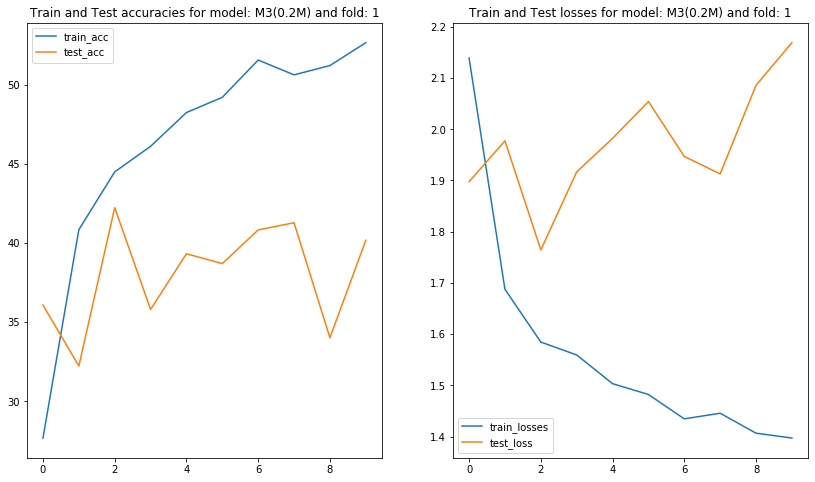

In [18]:

m3_config = {
    "model":M3,
    "num_epochs": 10,
    "model_name":"M3(0.2M)", 
    "data_loaders": data_loaders
}
train_model(m3_config)

In [19]:
data_loaders = next(k_fold_iter)

Current K-Fold is: 2


Train Epoch: 1 batch: 50 train loss: 2.4163965082168577 train accuracy: 21.4375
Train Epoch: 1 batch: 100 train loss: 2.189818621873856 train accuracy: 26.84375
Train Epoch: 1 train loss: 2.1210 train accuracy:28.43  test loss: 1.7695 test accuracy: 31.25
Train Epoch: 2 batch: 50 train loss: 1.7874036955833434 train accuracy: 38.21875
Train Epoch: 2 batch: 100 train loss: 1.7409204030036927 train accuracy: 40.21875
Train Epoch: 2 train loss: 1.7279 train accuracy:40.43  test loss: 1.9959 test accuracy: 32.56
Train Epoch: 3 batch: 50 train loss: 1.6395489192008972 train accuracy: 42.78125
Train Epoch: 3 batch: 100 train loss: 1.621111125946045 train accuracy: 44.984375
Train Epoch: 3 train loss: 1.6283 train accuracy:44.24  test loss: 1.7710 test accuracy: 41.14
Train Epoch: 4 batch: 50 train loss: 1.5752380776405335 train accuracy: 44.71875
Train Epoch: 4 batch: 100 train loss: 1.5650683999061585 train accuracy: 45.515625
Train Epoch: 4 train loss: 1.5609 train accuracy:45.51  test los

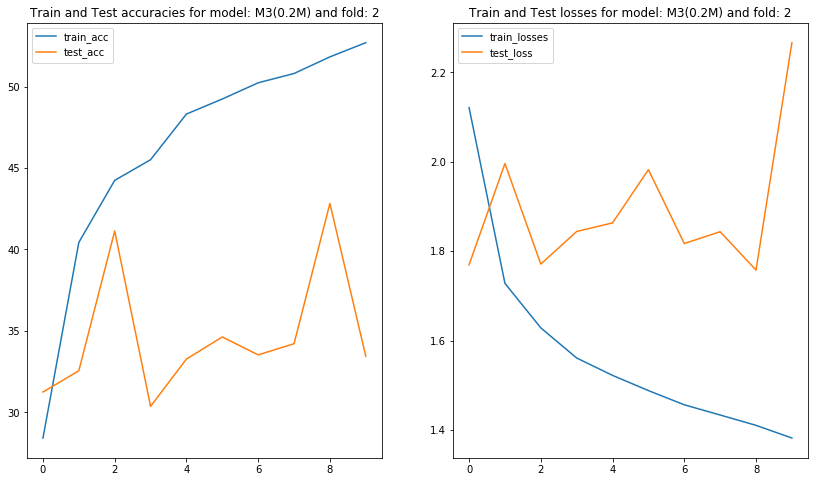

In [20]:
m3_config = {
    "model":M3,
    "num_epochs": 10,
    "model_name":"M3(0.2M)", 
    "data_loaders": data_loaders
}
train_model(m3_config)

In [21]:
data_loaders = next(k_fold_iter)

Current K-Fold is: 3


Train Epoch: 1 batch: 50 train loss: 2.4060340213775633 train accuracy: 21.875
Train Epoch: 1 batch: 100 train loss: 2.1745448076725005 train accuracy: 27.65625
Train Epoch: 1 train loss: 2.1211 train accuracy:28.97  test loss: 1.7474 test accuracy: 37.91
Train Epoch: 2 batch: 50 train loss: 1.7299746870994568 train accuracy: 39.0
Train Epoch: 2 batch: 100 train loss: 1.7181987047195435 train accuracy: 40.0
Train Epoch: 2 train loss: 1.7137 train accuracy:40.52  test loss: 2.3017 test accuracy: 36.40
Train Epoch: 3 batch: 50 train loss: 1.5983635783195496 train accuracy: 43.25
Train Epoch: 3 batch: 100 train loss: 1.585811241865158 train accuracy: 44.03125
Train Epoch: 3 train loss: 1.6007 train accuracy:43.78  test loss: 2.0577 test accuracy: 40.42
Train Epoch: 4 batch: 50 train loss: 1.5825372195243836 train accuracy: 44.5625
Train Epoch: 4 batch: 100 train loss: 1.5657435822486878 train accuracy: 45.90625
Train Epoch: 4 train loss: 1.5633 train accuracy:46.07  test loss: 1.8234 test

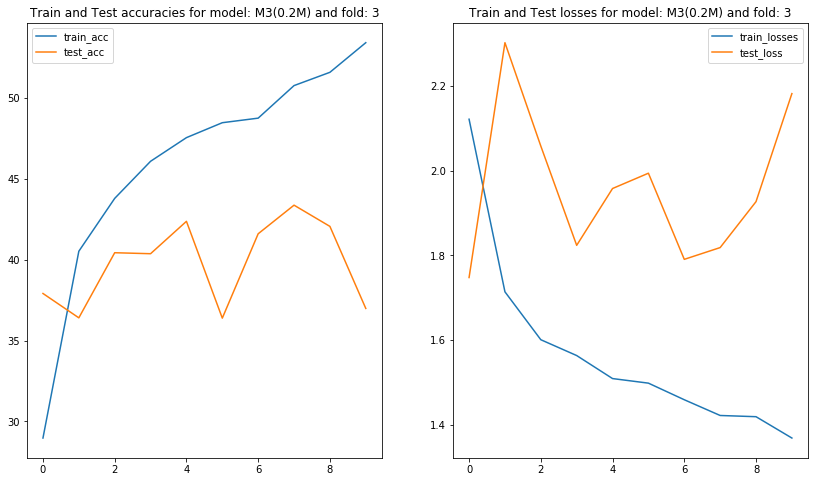

In [22]:
m3_config = {
    "model":M3,
    "num_epochs": 10,
    "model_name":"M3(0.2M)", 
    "data_loaders": data_loaders
}
train_model(m3_config)

In [0]:
data_loaders = next(k_fold_iter)
m3_config = {
    "model":M3,
    "num_epochs": 10,
    "model_name":"M3(0.2M)", 
    "data_loaders": data_loaders
}
train_model(m3_config)

Current K-Fold is: 4
Train Epoch: 1 batch: 50 train loss: 2.5132399082183836 train accuracy: 21.5
Train Epoch: 1 batch: 100 train loss: 2.215230423212051 train accuracy: 27.265625
Train Epoch: 1 train loss: 2.1452 train accuracy:28.64  test loss: 2.1638 test accuracy: 25.24
Train Epoch: 2 batch: 50 train loss: 1.7388909673690796 train accuracy: 38.4375
Train Epoch: 2 batch: 100 train loss: 1.7422391593456268 train accuracy: 38.265625
Train Epoch: 2 train loss: 1.7217 train accuracy:38.81  test loss: 1.8793 test accuracy: 34.54
Train Epoch: 3 batch: 50 train loss: 1.6234068274497986 train accuracy: 42.15625
Train Epoch: 3 batch: 100 train loss: 1.6111943137645721 train accuracy: 43.375
Train Epoch: 3 train loss: 1.6060 train accuracy:43.40  test loss: 1.8491 test accuracy: 37.82
Train Epoch: 4 batch: 50 train loss: 1.5241900324821471 train accuracy: 47.3125
Train Epoch: 4 batch: 100 train loss: 1.5377885615825653 train accuracy: 46.09375


In [0]:
data_loaders = next(k_fold_iter)
m3_config = {
    "model":M3,
    "num_epochs": 10,
    "model_name":"M3(0.2M)", 
    "data_loaders": data_loaders
}
train_model(m3_config)

In [0]:
data_loaders = next(k_fold_iter)
m3_config = {
    "model":M3,
    "num_epochs": 10,
    "model_name":"M3(0.2M)", 
    "data_loaders": data_loaders
}
train_model(m3_config)

In [0]:
data_loaders = next(k_fold_iter)
m3_config = {
    "model":M3,
    "num_epochs": 10,
    "model_name":"M3(0.2M)", 
    "data_loaders": data_loaders
}
train_model(m3_config)

In [0]:
data_loaders = next(k_fold_iter)
m3_config = {
    "model":M3,
    "num_epochs": 10,
    "model_name":"M3(0.2M)", 
    "data_loaders": data_loaders
}
train_model(m3_config)

In [0]:
data_loaders = next(k_fold_iter)
m3_config = {
    "model":M3,
    "num_epochs": 10,
    "model_name":"M3(0.2M)", 
    "data_loaders": data_loaders
}
train_model(m3_config)

In [0]:
data_loaders = next(k_fold_iter)
m3_config = {
    "model":M3,
    "num_epochs": 10,
    "model_name":"M3(0.2M)", 
    "data_loaders": data_loaders
}
train_model(m3_config)

In [0]:
m11_config = {
    "model":M11,
    "num_epochs": 10,
    "model_name":"M11(1.8M)"
}
train_model(m11_config)


In [0]:
m18_config = {
    "model":M18,
    "num_epochs": 10,
    "model_name":"M18(3.7M)"
}
train_model(m18_config)

In [0]:
m34_config = {
    "model":M34Res,
    "num_epochs": 10,
    "model_name":"M34-res(4M)"
}
train_model(m34_config)


## TODO

* Implement Models
  1. M3
  2. M5
  3. M11
  4. M18
  5. M34-res
* Implement accuracy calculation
* Implement training loop
* Implement evaluation loop
* Implement method to plot losses and accuracies
* Implement kFold iterable
* Implementing a method to save model to google drive